# Capital Asset Pricing Model

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [4]:

# Define a constant for the risk-free interest rate
RISK_FREE_RATE = 0.05

# Define a constant for the number of months in a year
MONTHS_IN_YEAR = 12

# Define a class called CAPM
class CAPM:
    def __init__(self, stocks, start_date, end_date):
        # Initialize instance variables for the class
        self.data = None
        self.stocks = stocks
        self.start_date = start_date
        self.end_date = end_date

    # Define a method to download stock price data using Yahoo Finance API
    def download_data(self):
        data = {}
        for stock in self.stocks:
            # Download the stock price data from Yahoo Finance
            ticker = yf.download(stock, self.start_date, self.end_date)
            # Store the adjusted closing price for each stock in a dictionary
            data[stock] = ticker['Adj Close']
        # Return a pandas DataFrame that contains the adjusted closing prices for each stock
        return pd.DataFrame(data)
    
    # Define a method to initialize the CAPM class
    def initialize(self):
        # Download and resample the stock price data
        stock_data = self.download_data()
        stock_data = stock_data.resample('M').last()
        
        # Calculate the logarithmic monthly returns for each stock
        self.data = pd.DataFrame({'s_adjclose': stock_data[self.stocks[0]],
                                  'm_adjclose': stock_data[self.stocks[1]]})
        self.data[['s_returns', 'm_returns']] = np.log(self.data[['s_adjclose','m_adjclose']]/ self.data[['s_adjclose','m_adjclose']].shift(1))

        # Remove the first row (which contains NaN values)
        self.data = self.data[1:]
        print(self.data.head(5))

    # Define a method to calculate the beta of a stock
    def calculate_beta(self):
        # Calculate the covariance matrix between the stock and the market
        covariance_matrix = np.cov(self.data['s_returns'], self.data['m_returns'])
        # Calculate the beta using the formula: cov(stock_returns, market_returns) / var(market_returns)
        beta = covariance_matrix[0,1] / covariance_matrix[1,1]
        print("Beta from formula: ", beta)

    # Define a method to perform linear regression and plot the results
    def regression(self):
        # Use linear regression to fit a line to the stock and market returns
        beta, alpha = np.polyfit(self.data['m_returns'], self.data['s_returns'], deg=1)
        print("Beta from regression: ", beta)
        # Calculate the expected return using the CAPM formula: R_a = R_f + beta * (R_m - R_f)
        expected_return = RISK_FREE_RATE + beta * (self.data['m_returns'].mean()*MONTHS_IN_YEAR - RISK_FREE_RATE)
        print("Expected Annual return: ", expected_return)

        # Plot the results using matplotlib
        self.plot_regression(alpha, beta)

    # Define a method to plot the linear regression line
    def plot_regression(self, alpha, beta):
        # Create a figure and axis object for the plot
        fig, axis = plt.subplots(1, figsize=(20,10))
        # Plot the data points on the scatter plot
        axis.scatter(self.data['m_returns'], self.data['s_returns'], label="Data Points")
        # Plot the CAPM line on the same axis as the scatter plot
        axis.plot(self.data['m_returns'], beta * self.data['m_returns'] + alpha, color = 'red', label="CAPM Line")
        # Add a title to the plot
        plt.title("CAPM, Finding Alphas and Betas", fontsize=25)
        # Add a label to the x-axis
        plt.xlabel("Market Returns $R_m$", fontsize=18)
        # Add a label to the y-axis
        plt.ylabel("Stock Returns $R_a$", fontsize=18)
        # Add a text box to the plot with the equation of the CAPM line
        plt.text(0.08, 0.05, f'$R_a = {beta.round(4)} * R_m + {alpha.round(4)}$', fontsize=18)
        # Add a legend to the plot
        plt.legend()
        # Add a grid to the plot
        plt.grid(True)
        # Show the plot
        plt.show()




[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
            s_adjclose   m_adjclose  s_returns  m_returns
Date                                                     
2010-01-31   74.226868  1073.869995  -0.067221  -0.037675
2010-02-28   77.464706  1104.489990   0.042696   0.028115
2010-03-31   78.128708  1169.430054   0.008535   0.057133
2010-04-30   78.585609  1186.689941   0.005831   0.014651
2010-05-31   76.698380  1089.410034  -0.024308  -0.085532
Beta from formula:  0.7301124476109696
Beta from regression:  0.7301124476109699
Expected Annual return:  0.08619369516512956


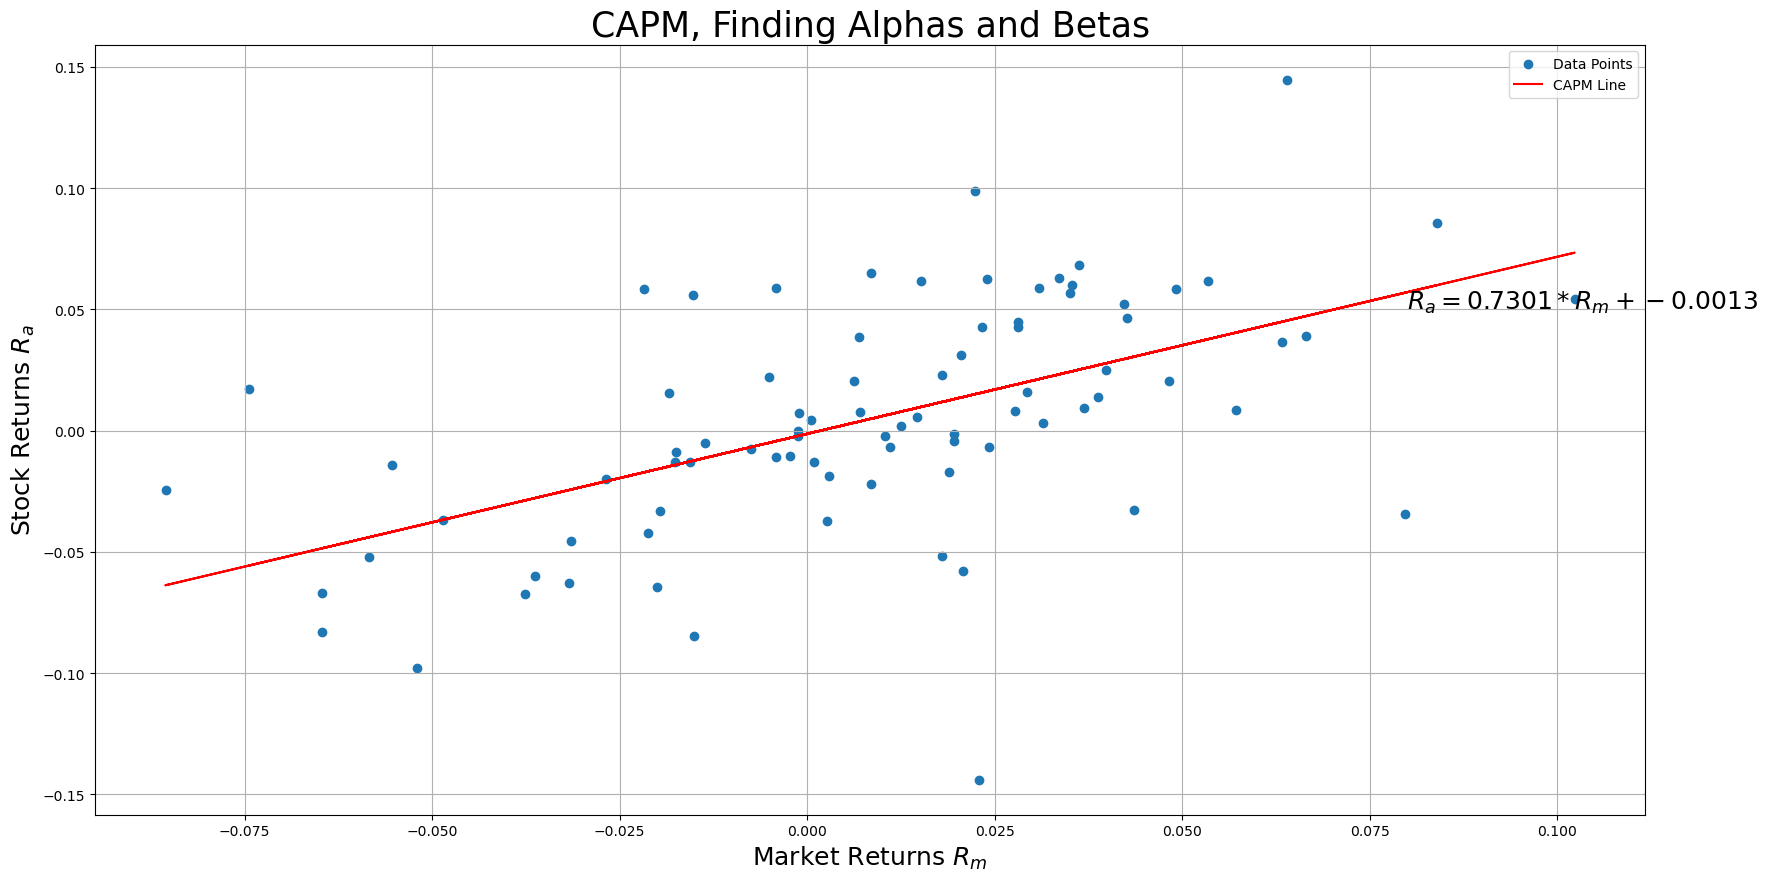

In [5]:
# Run this code if the script is run as the main program (not imported as a module)
if __name__ == "__main__":
    # Create a new instance of the CAPM class, specifying the stocks to analyze and the start/end dates
    capm = CAPM(['IBM', '^GSPC'], '2009-12-01', '2017-01-01')
    
    # Call the initialize method of the CAPM class to download and prepare the stock price data
    capm.initialize()
    
    # Call the calculate_beta method of the CAPM class to calculate the beta of the stock
    capm.calculate_beta()
    
    # Call the regression method of the CAPM class to perform linear regression and plot the results
    capm.regression()

# Normal Distribution of Returns

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from scipy.stats import norm

In [2]:
# Define a function to download the stock price data for a given stock and time range
def download_data(stock, start_date, end_date):
    # Create an empty dictionary to store the stock price data
    data = {}
    
    # Download the stock price data from Yahoo Finance using the yf.download() function
    ticker = yf.download(stock, start_date, end_date)
    
    # Store the adjusted closing price data in the 'Price' column of the dictionary
    data['Price'] = ticker['Adj Close']
    
    # Return a pandas DataFrame that contains the stock price data
    return pd.DataFrame(data)

In [3]:
# Call the download_data function to download the stock price data for IBM between 2010-01-01 and 2020-01-01
stock_data = download_data('IBM', '2010-01-01', '2020-01-01')

# Display the first 5 rows of the stock price data using the head() method
stock_data.head(5)

[*********************100%***********************]  1 of 1 completed


,Price
Date,
2010-01-04,79.247444
2010-01-05,78.290146
2010-01-06,77.781586
2010-01-07,77.512352
2010-01-08,78.290146


In [4]:
# Define a function to calculate the monthly returns for a given stock price DataFrame
def calculate_return(stock_data):
    # Calculate the logarithmic monthly returns using the np.log() function
    stock_data['Return'] = np.log(stock_data['Price']/ stock_data['Price'].shift(1)) 
    
    # Return a new DataFrame that contains the returns, starting from the second row (since the first row has NaN values)
    return stock_data[1:]

In [5]:
# Call the calculate_return function to calculate the monthly returns for the stock price data
stock_data = calculate_return(stock_data)

# Display the first 5 rows of the stock price data, which now includes the calculated returns
stock_data.head(5)

,Price,Return
Date,,
2010-01-05,78.290146,-0.012153
2010-01-06,77.781586,-0.006517
2010-01-07,77.512352,-0.003467
2010-01-08,78.290146,0.009984
2010-01-11,77.470451,-0.010525


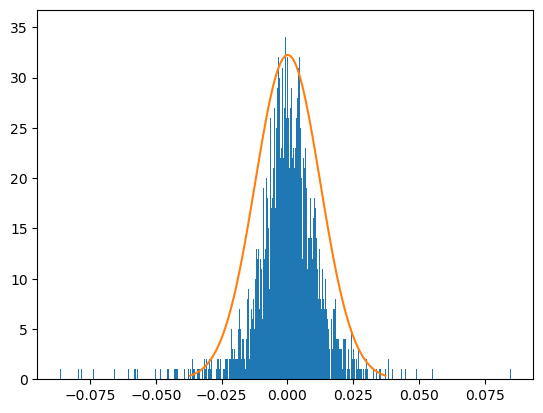

In [7]:
# Define a function to visualize the distribution of returns for a given stock price DataFrame
def show(stock_data):
    # Extract the 'Return' column from the stock_data DataFrame
    stock_data = stock_data['Return']
    
    # Create a histogram of the returns using the plt.hist() function
    plt.hist(stock_data, bins=700)
    
    # Calculate the variance, mean, and standard deviation of the returns
    stock_variance = stock_data.var()
    stock_mean = stock_data.mean()
    sigma = np.sqrt(stock_variance)
    
    # Generate a normal distribution with the same mean and standard deviation as the returns
    x = np.linspace(stock_mean - 3 * sigma, stock_mean + 3 * sigma, 100)
    plt.plot(x, norm.pdf(x, stock_mean, sigma))
    
    # Display the histogram and normal distribution on the same plot using the plt.show() function
    plt.show()

# Call the show function to visualize the distribution of returns for the stock price data
show(stock_data)